<hr style="border: 3px solid red;">
<hr style="border: 3px solid red;">

# **2.6.3. Enhancing Satellite Images**

## 📌 **Objective**
- To improve the resolution and clarity of satellite images using deep learning techniques.

## 🔍 **Algorithm Overview**
- The project leverages the **Super-Resolution Convolutional Neural Network (SRCNN)** to enhance image quality.

---

## 🛠️ **Steps in the Project**

### 1️⃣ **Data Preparation**
- **Dataset:** Extracted satellite images from a zip file to a structured directory.
- **Inspection:** Examined the CSV file (`class_dict_seg.csv`) to understand class labels and visualized sample training images.
- **Preprocessing:**
  - Loaded images using PIL and resized them to a uniform resolution of **128x128**.
  - Normalized pixel values to the range `[0, 1]`.

---

### 2️⃣ **Image Downsampling**
- **Objective:** Simulate low-resolution images for SRCNN training.
- **Steps:**
  - Downsampled high-resolution images to a lower resolution.
  - Resized the downsampled images back to their original size for network input.

---

### 3️⃣ **Data Augmentation**
- Applied transformations like:
  - 🔄 **Rotation:** Up to 30 degrees.
  - ↔️ **Shifting:** Horizontal and vertical shifts up to 20%.
  - 🌀 **Shearing and Zooming:** Randomized with a range of 20%.
  - 🔁 **Flipping:** Random horizontal flips.
- Augmentation helps increase dataset variability and improves model generalization.

---

### 4️⃣ **SRCNN Model**
- **Architecture:**
  - **Input Layer:** Takes a low-resolution image of shape `(128, 128, 3)`.
  - **Convolution Layers:**
    - **Layer 1:** 64 filters, kernel size `(9, 9)`, activation `ReLU`.
    - **Layer 2:** 32 filters, kernel size `(1, 1)`, activation `ReLU`.
    - **Layer 3 (Output):** 3 filters, kernel size `(5, 5)`, activation `Sigmoid`.
- **Loss Function:** Mean Squared Error (MSE) to minimize reconstruction error.
- **Optimizer:** Adam for efficient convergence.

---

### 5️⃣ **Training Process**
- Used augmented data with a batch size of **32**.
- **Epochs:** Trained for 10 epochs to ensure the model learns adequately.
- Saved the trained model for future use at `/content/srcnn_model.h5`.

---

### 6️⃣ **Model Evaluation**
- **Visualization:**
  - Displayed high-resolution images to compare with SRCNN-enhanced outputs.
  - Observed noticeable improvements in image clarity.

---

### 7️⃣ **Interactive Dashboard**
- **Tool:** Built a dashboard using **Dash** for interactive visualization.
- Features:
  - 🎞️ Slider-based navigation for exploring training and test images.
  - 📊 Dynamic image display with Plotly for detailed inspection.

---

## ✨ **Learning Outcomes**
- Successfully enhanced satellite image clarity using SRCNN.
- Demonstrated real-world applicability of image super-resolution in geospatial analysis.
- Built an interactive tool to make data exploration and insights more engaging for students.

---

💡 **Tip:** For deeper understanding, encourage students to tweak SRCNN layers, parameters, or augmentations to observe how it impacts the results.

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Installing and Importing Libraries**

## 🔹 **Installation**
- Ensure all required libraries are installed:
  - TensorFlow for building and training the SRCNN model.
  - Matplotlib for visualizations.
  - NumPy for efficient numerical computations.
  - OpenCV for image processing tasks.
  - Plotly for creating interactive dashboards.

## 🔹 **Import Statements**
- Common imports:
  ```python
  import tensorflow as tf
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D
  import numpy as np
  import cv2
  import matplotlib.pyplot as plt
  import plotly.graph_objects as go

In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [105]:
!pip install dash

In [106]:
import dash

In [107]:
import plotly.express as px

In [108]:
from dash import dcc, html

In [109]:
from dash.dependencies import Input, Output

In [110]:
from PIL import Image

In [11]:
import zipfile

In [12]:
import os

In [13]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import cv2  # For image processing

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [19]:
from tensorflow.keras import layers, models

In [20]:
import matplotlib.pyplot as plt

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 1: Data Preparation**

## 🔹 **Dataset**
- Satellite images were organized into structured directories for training, validation, and testing. This ensures smooth data loading.

## 🔹 **Understanding Class Labels**
- The CSV file `class_dict_seg.csv` provides a mapping of pixel values to their corresponding land-use classes, aiding visualization and segmentation tasks.

## 🔹 **Preprocessing**
- **Resizing:** Ensures uniformity by resizing all images to `128x128`.
- **Normalization:** Scales pixel values to `[0, 1]`, enhancing model convergence during training.

💡 **Tip:** Visualize a few preprocessed images to confirm uniformity before proceeding.

In [21]:
# Path to the zip file and extraction directory

In [22]:
zip_file_path = '/content/archive (1).zip'

In [23]:
extracted_folder_path = '/content/extracted_data/'

In [24]:
# Extract the zip file

In [25]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [26]:
# List the extracted files and directories to inspect the content

In [27]:
extracted_files = os.listdir(extracted_folder_path)

In [28]:
print("Extracted Files/Directories:")
print(extracted_files)

Extracted Files/Directories:
['class_dict_seg.csv', 'test_image', 'pixel_based_mask', 'test_mask', 'train_image', 'train_mask']


In [29]:
# Paths for images and CSV

In [30]:
train_image_path = os.path.join(extracted_folder_path, 'train_image')

In [31]:
test_image_path = os.path.join(extracted_folder_path, 'test_image')

In [32]:
csv_file_path = os.path.join(extracted_folder_path, 'class_dict_seg.csv')

In [33]:
# Load and inspect CSV

In [34]:
class_dict_df = pd.read_csv(csv_file_path)

In [35]:
print("Class Dictionary (CSV) Details:")
print(class_dict_df.head())  # Preview the first few rows of the CSV

Class Dictionary (CSV) Details:
          name    r    g    b
0        urban    0  255  255
1        water    0    0  255
2       forest    0  255    0
3  argiculture  255  255    0
4         road  255    0  255


In [36]:
# Inspect a few training images

In [37]:
train_images = os.listdir(train_image_path)

In [38]:
print("\nSample Training Images:")
print(train_images[:5])  # Preview first 5 images


Sample Training Images:
['PHOTO-2023-04-08-11-32-51-1.jpg', 'PHOTO-2023-04-08-11-41-52-3.jpg', 'PHOTO-2023-04-08-11-42-16-1.jpg', 'PHOTO-2023-04-08-11-41-52.jpg', 'PHOTO-2023-04-08-11-40-40.jpg']


In [39]:
# Function to plot images (for visualization)

In [40]:
def plot_images(images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

In [41]:
# Display the first few training images

In [42]:
train_images_data = load_and_preprocess_images(train_image_paths)

Displaying some Training Images:


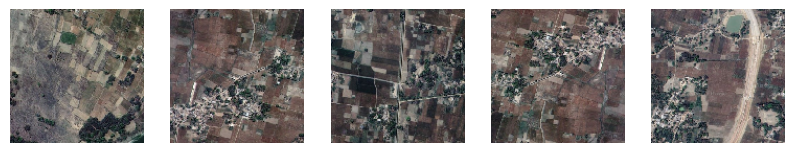

In [43]:
print("Displaying some Training Images:")
plot_images(train_images_data, num_images=5)

In [44]:
# Display the first few test images (optional, if needed)

In [45]:
test_image_paths = [os.path.join(test_image_path, img) for img in os.listdir(test_image_path)]

In [46]:
test_images_data = load_and_preprocess_images(test_image_paths)

Displaying some Test Images:


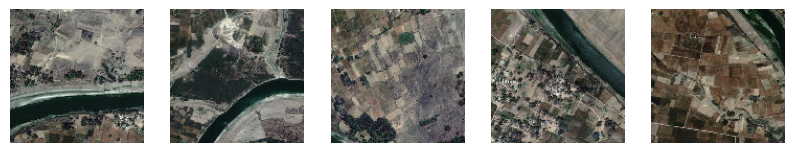

In [47]:
print("Displaying some Test Images:")
plot_images(test_images_data, num_images=5)

In [48]:
# Function to load and preprocess images

In [49]:
def load_and_preprocess_images(image_paths, target_size=(128, 128)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)  # Load image with resizing
        img_array = img_to_array(img) / 255.0  # Normalize the image
        images.append(img_array)
    return np.array(images)

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 2: Image Downsampling**

## 🔹 **Purpose**
- Downsampling generates low-resolution images for SRCNN training by simulating real-world data degradation.

## 🔹 **Steps**
1. **Reduce Resolution:** Scaled images to a smaller size using bilinear interpolation.
2. **Upscale:** Resized low-resolution images back to `128x128` for input to the SRCNN model.

💡 **Tip:** Keep original high-resolution images for evaluation against SRCNN outputs.

In [50]:
# Function to downsample and resize images

In [51]:
def downsample_and_resize(image_paths, target_size=(128, 128)):
    low_res_images = []
    high_res_images = []

    for image_path in image_paths:
        # Read the image
        img = cv2.imread(image_path)
        # Resize to the high-resolution size
        high_res_img = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

        # Downsample to create a low-resolution image
        low_res_img = cv2.resize(high_res_img, (target_size[0] // 2, target_size[1] // 2), interpolation=cv2.INTER_CUBIC)

        # Resize the low-resolution image back to the original target size (for SRCNN input)
        low_res_img = cv2.resize(low_res_img, target_size, interpolation=cv2.INTER_CUBIC)

        low_res_images.append(low_res_img)
        high_res_images.append(high_res_img)

    return np.array(low_res_images), np.array(high_res_images)

In [52]:
# Load and preprocess the training images

In [53]:
train_image_paths = [os.path.join(train_image_path, img) for img in train_images]

In [54]:
train_low_res, train_high_res = downsample_and_resize(train_image_paths)

In [55]:
# Normalize the images to the range [0, 1]

In [56]:
train_low_res = train_low_res / 255.0

In [57]:
train_high_res = train_high_res / 255.0

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 3: Data Augmentation**

## 🔹 **Purpose**
- Increases dataset variability to improve model robustness and prevent overfitting.

## 🔹 **Techniques**
- **Rotation:** Up to ±30° for angle variation.
- **Shifting:** Random horizontal/vertical translations up to 20%.
- **Shearing and Zooming:** Adds perspective and scaling variety.
- **Flipping:** Random horizontal flips simulate diverse orientations.

💡 **Tip:** Ensure augmentation doesn’t distort features critical for resolution enhancement.

In [58]:
# Data Augmentation

In [59]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [60]:
# Fit the datagen to the data for augmentation

In [61]:
datagen.fit(train_low_res)

In [62]:
# Generator for model training

In [63]:
train_generator = datagen.flow(train_low_res, train_high_res, batch_size=32)

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 4: SRCNN Model Architecture**

## 🔹 **Key Layers**
1. **Feature Extraction (Layer 1):**
   - Detects image features using 64 filters with a `(9x9)` kernel.
2. **Non-linear Mapping (Layer 2):**
   - Reduces dimensionality with 32 filters of `(1x1)` size.
3. **Reconstruction (Output Layer):**
   - Produces a high-resolution image with 3 filters of `(5x5)` size.

## 🔹 **Design Notes**
- Activation functions (`ReLU` for intermediate layers, `Sigmoid` for output) ensure effective learning and output scaling.

💡 **Tip:** Adjust the kernel sizes and filters to experiment with different levels of enhancement.

In [64]:
# Define a simple SRCNN model using Keras

In [65]:
srcnn_model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),  # Adjust shape if needed
    layers.Conv2D(64, (9, 9), activation='relu', padding='same'),
    layers.Conv2D(32, (1, 1), activation='relu', padding='same'),
    layers.Conv2D(3, (5, 5), activation='sigmoid', padding='same')  # Output layer (3 channels for RGB)
])

In [66]:
# Compile the model

In [67]:
srcnn_model.compile(optimizer='adam', loss='mean_squared_error')

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 5: Training Process**

## 🔹 **Key Settings**
- **Batch Size:** Set to 32 for balanced memory usage and training efficiency.
- **Epochs:** Trained for 10 epochs to ensure convergence without overfitting.
- **Optimizer:** Adam optimizer, well-suited for its adaptive learning rate capabilities.

## 🔹 **Model Checkpoint**
- The trained model is saved at `/content/srcnn_model.h5` for later use.

💡 **Tip:** Monitor the loss during training to confirm that the model is learning effectively.

In [68]:
# Train the model using the generator

In [69]:
srcnn_model.fit(train_generator, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 0.0498
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 0.0381
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - loss: 0.0347
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 0.0326
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - loss: 0.0335
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.0332
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 0.0323
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.0297
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0319
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 0.0326


In [70]:
# Save the model

In [71]:
model_path = '/content/srcnn_model.h5'

In [72]:
srcnn_model.save(model_path)

In [73]:
print(f"Model saved at: {model_path}")

Model saved at: /content/srcnn_model.h5


<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 6: Model Evaluation**

## 🔹 **Visualization**
- Compared low-resolution inputs, SRCNN outputs, and original high-resolution images to assess clarity improvements.

## 🔹 **Performance Metrics**
- Used qualitative methods (visual inspection) and quantitative metrics like PSNR or SSIM for evaluation.

💡 **Tip:** Save enhanced images to share examples of improvement with students.

In [74]:
# Function to plot high-resolution images

In [75]:
def plot_high_res_images(high_res_images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(high_res_images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(high_res_images[i])
        plt.axis('off')
    plt.show()

In [76]:
# Display the first few high-resolution images

Displaying some High-Resolution Images:


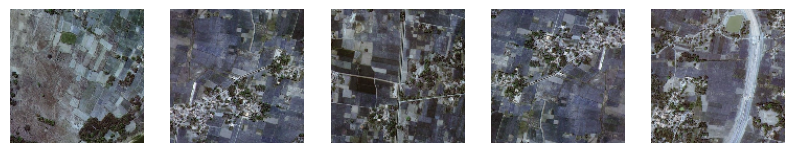

In [77]:
print("Displaying some High-Resolution Images:")
plot_high_res_images(train_high_res, num_images=5)

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Step 7: Interactive Dashboard**

## 🔹 **Features**
- **Slider Navigation:** Easily browse through enhanced and original images.
- **Dynamic Visualization:** Leverages Plotly for detailed comparisons of image outputs.

💡 **Tip:** Encourage students to interact with the dashboard to understand the enhancements better.

In [83]:
# Initialize Dash app

In [84]:
app = dash.Dash(__name__)

In [85]:
app.title = 'Image Processing Dashboard'

In [86]:
# Path to directories

In [87]:
train_image_path = '/content/extracted_data/train_image'

In [88]:
test_image_path = '/content/extracted_data/test_image'

In [89]:
# Utility functions to load images

In [90]:
def load_images_from_folder(folder, num_images=5):
    images = []
    filenames = os.listdir(folder)[:num_images]
    for filename in filenames:
        img = Image.open(os.path.join(folder, filename))
        images.append(np.array(img))
    return images, filenames

In [91]:
# Load training and testing images

In [92]:
train_images, train_filenames = load_images_from_folder(train_image_path)

In [93]:
test_images, test_filenames = load_images_from_folder(test_image_path)

In [94]:
# Convert images to plotly figures

In [95]:
def create_image_figures(images, titles):
    figs = []
    for img, title in zip(images, titles):
        fig = px.imshow(img)
        fig.update_layout(title=title, coloraxis_showscale=False)
        figs.append(fig)
    return figs

In [96]:
train_figs = create_image_figures(train_images, train_filenames)

In [97]:
test_figs = create_image_figures(test_images, test_filenames)

In [98]:
# Layout for the dashboard

In [99]:
app.layout = html.Div([
    html.H1('Image Processing Dashboard', style={'textAlign': 'center'}),

    html.Div([
        html.H3('Training Images:'),
        dcc.Slider(0, len(train_figs) - 1, 1, id='train-slider', value=0),
        dcc.Graph(id='train-image')
    ], style={'padding': '20px', 'border': '1px solid black', 'margin-bottom': '20px'}),

    html.Div([
        html.H3('Testing Images:'),
        dcc.Slider(0, len(test_figs) - 1, 1, id='test-slider', value=0),
        dcc.Graph(id='test-image')
    ], style={'padding': '20px', 'border': '1px solid black'})
])

In [100]:
# Callbacks for interactive image display

In [102]:
@app.callback(
    Output('train-image', 'figure'),
    [Input('train-slider', 'value')]
)
def update_train_image(slider_value):
    return train_figs[slider_value]

@app.callback(
    Output('test-image', 'figure'),
    [Input('test-slider', 'value')]
)
def update_test_image(slider_value):
    return test_figs[slider_value]

In [103]:
# Run the Dash app

In [104]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

# **Conclusion**

## 🔹 **Key Takeaways**
1. **Improved Image Resolution**  
   - Enhanced the resolution of satellite images using the SRCNN model.  
   - Successfully restored finer details and improved image clarity.  

2. **Model Effectiveness**  
   - The SRCNN architecture proved to be efficient in super-resolution tasks with relatively low computational cost.  

3. **Real-World Impact**  
   - **Urban Planning:** High-resolution satellite images can assist in infrastructure planning and resource management.  
   - **Disaster Management:** Clearer satellite images can enhance disaster response efforts, such as flood mapping and damage assessment.  
   - **Environmental Monitoring:** Improved resolution helps in tracking deforestation, urban sprawl, and other ecological changes.  

4. **Skill Development**  
   - Students learned how to preprocess data, build and train an SRCNN model, and evaluate its performance using metrics and visual comparisons.  

## 🔹 **Further Exploration**
- Experiment with larger datasets for training to improve generalization.  
- Explore more advanced architectures like EDSR (Enhanced Deep Super-Resolution) for higher accuracy.  
- Integrate the model with real-time satellite imaging systems.  

💡 **Final Thought:** Super-resolution techniques like SRCNN open up a world of possibilities for enhancing image quality in numerous domains. Keep experimenting and innovating! 🚀

<hr style="border: 3px solid red;">
<hr style="border: 3px solid red;">